   # Analysis of Netflix Contents


## Introduction

Netflix, Inc. is an American subscription streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.[1]


# Credibility of Data 


Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


# What covered in this analysis

* What percent of the content consists of Movies and TV Shows?

* Insight into about the maturity rating distribution over movie and TV Shows.

* Year-round upload trend between Movies and TV Shows.

* Insight into duration of Movies and TV Shows.

## Import libraries

In [614]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral3
from bokeh.transform import factor_cmap
from bokeh.models import NumeralTickFormatter
output_notebook()

Loading BokehJS ...

## Import dataset and check general features

In [615]:
data=pd.read_csv("/Users/user/Documents/Netflix/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [616]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [617]:
data["duration"] = data["duration"].apply(str)

In [618]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [619]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

According to Netflix age rating '74 min', '84 min' and '66 min' are wrongly entered to the dataset. Also NAN values should removed from the column.

In [620]:
data["rating"].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

# 3. Process: cleaning and checking the information
 A strong analysis depends on the integrity of the data. In this phase I'm going to check completeness (the degree to which all required measures are known) of data.
 
 How many Null value is exist and is it possible to replace or delete them completely? Depends on the volume of the Null values.
 
 Also I'm gonna add columns (enrich the data) that will be needed for analysis.
 

Director and cast information will not be used in this analysis, those can stay in NaN stage.

In [621]:
pd.isna(data).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

* REMOVE

I'll remove null value in date added column because it's affecting integrity of data also the column has higher priority for this analysis.


In [622]:
data.dropna(subset=["date_added"], inplace=True)
data.dropna(subset=["rating"], inplace=True)
data.dropna(subset=["country"], inplace=True)

data.reset_index(drop=True, inplace=True)

In [623]:
pd.isna(data).sum()

show_id            0
type               0
title              0
director        2214
cast             671
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

> Also remove white spaceses

In [624]:
data.columns =[column.replace(" ", "") for column in data.columns]

## Enriching the dataset

> Exctract and add as new column added year from added_date for further analysis

In [625]:
splt_date=data["date_added"].str.split(',', expand=True)
data["added_year"]=splt_date[1]

 Create target viewer column to further analysis; in order  to understand rating types better to based on [maturity ratings](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) information

In [626]:
maturity_ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [627]:
data['maturity_ratings'] = data['rating'].replace(maturity_ratings)
data['maturity_ratings'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min'], dtype=object)

In [628]:
data["added_year"].unique()

array([' 2021', ' 2020', ' 2019', ' 2018', ' 2017', ' 2016', ' 2015',
       ' 2014', ' 2013', ' 2012', ' 2011', ' 2009', ' 2008', ' 2010'],
      dtype=object)

### Group movie data and create duration category 

In [629]:
movie=data[data["type"]=="Movie"]
movie.reset_index(inplace=True,drop=True)
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,maturity_ratings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Teens
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,Adults
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,Teens
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,Adults
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,Adults
5686,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Adults
5687,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Adults
5688,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Older Kids


After splitting, a problem occurred in 3 rows, they are detected and removed by this code:

In [630]:
x = 0
for i in movie['duration']:
    userInput = i.split(' ')[0]
    try:
        val = int(userInput)
    except ValueError:
        print("That's not an int!   " + userInput + "  index: " + str(x) )
        movie = movie.drop([x])
    x = x +1

That's not an int!   nan  index: 3200
That's not an int!   nan  index: 3368
That's not an int!   nan  index: 3377


In [631]:
movie["duration"]=movie['duration'].apply(lambda x: int(x.split(' ')[0]))
movie["duration"]=movie["duration"].apply(int)
movie.loc[movie[movie.duration < 90].index, 'durationCategory'] = "shorter than 1.30h"
movie.loc[movie[(movie.duration>= 90) & (movie.duration < 150)].index, 'durationCategory'] = "between 1.30h and 2.30h"
movie.loc[movie[movie.duration >=150].index, 'durationCategory'] = "longer than 2.30h"

In [632]:
df_movie =movie.copy()
df_movie = df_movie.groupby(["durationCategory"]).agg({"show_id":"count"}).reset_index()
df_movie.columns=["durationCategory","contentNumber"]
df_movie=df_movie.sort_values(by=["durationCategory"])
df_movie.reset_index(inplace=True,drop=True)


In [633]:

df_mapping = pd.DataFrame({
    'durationCategory': ["shorter than 1.30h", "between 1.30h and 2.30h", "longer than 2.30h"]
})
sort_mapping = df_mapping.reset_index().set_index('durationCategory')
df_movie['cat_num'] = df_movie['durationCategory'].map(sort_mapping['index'])
df_movie.sort_values(by='cat_num',inplace=True)
df_movie



,durationCategory,contentNumber,cat_num
2,shorter than 1.30h,1609,0
0,between 1.30h and 2.30h,3840,1
1,longer than 2.30h,238,2


**DATA TYPES**

> Convert data type of "type" colmn to categorical data type for further analysis

In [634]:
# type to categorical dtype
data['type'] = pd.Categorical(data['type'])
# maturity_ratings to categorical dtype (4 classes)
data['maturity_ratings'] = pd.Categorical(data['maturity_ratings'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# added year to numeric dtype
data['added_year'] = pd.to_numeric(data['added_year'], errors='coerce')

# 4. Analyze: data to find patterns, relationships and trends

In this phase I'm going to use aggregate functions, sorting the data in order to gain more insights and make sense of data that collected.

The oldest movie released in 1942, the newest is in 2021.

In [635]:
data.sort_values(by=["release_year"])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,maturity_ratings
7387,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017,Teens
6989,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,2017,Teens
7923,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017,Older Kids
7824,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,2017,Older Kids
7900,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,2017,Older Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...,2021,Teens
803,s1137,Movie,Tersanjung the Movie,"Hanung Bramantyo, Pandu Adjisurya","Clara Bernadeth, Giorgino Abraham, Kevin Ardil...",Indonesia,"April 1, 2021",2021,TV-14,114 min,"Dramas, International Movies, Romantic Movies","After growing up in a tumultuous household, Yu...",2021,Teens
350,s539,TV Show,The A List,NaN,"Lisa Ambalavanar, Ellie Duckles, Savannah Bake...",United Kingdom,"July 6, 2021",2021,TV-PG,2 Seasons,"British TV Shows, International TV Shows, TV D...","Romance, rivalry and radical mystery collide a...",2021,Older Kids
1075,s1431,TV Show,Pretend It’s a City,NaN,Fran Lebowitz,United States,"January 8, 2021",2021,TV-14,1 Season,Docuseries,Wander the New York City streets and fascinati...,2021,Teens


The first content added in 2008 and it was a movie, the last one was in 2021, also was movie.

In [636]:
data.sort_values(by=["added_year"])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,maturity_ratings
5892,s6612,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008,Adults
5277,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,Adults
5275,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,Adults
5276,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,Adults
6592,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,s1046,TV Show,Next in Fashion,NaN,"Tan France, Alexa Chung",United States,"April 15, 2021",2020,TV-14,1 Season,Reality TV,Talented designers from around the world compe...,2021,Teens
730,s1047,Movie,Only Mine,Michael Civille,"Amber Midthunder, Brett Zimmerman, Chris Brown...",United States,"April 15, 2021",2019,TV-14,88 min,Thrillers,After dating a charming cop who turns into an ...,2021,Teens
731,s1048,TV Show,Peasants Rebellion,NaN,"Ward El Kal, Aimée Sayah, Bassem Moughnie, Car...",Lebanon,"April 15, 2021",2018,TV-14,1 Season,"International TV Shows, TV Dramas","In feudalistic Lebanon, farmers revolt against...",2021,Teens
733,s1050,TV Show,Ricky Zoom,NaN,"Max Fincham, Twinkle Jaiswal, Bradley Bissett,...","China, United Kingdom","April 15, 2021",2019,TV-Y,1 Season,"British TV Shows, Kids' TV",Race along with Ricky Zoom and his loyal Bike ...,2021,Kids


In [637]:
data["added_year"].mode()

0    2019
Name: added_year, dtype: int64

The highest number of content added in 2019.

In [638]:
data["maturity_ratings"].mode()

0    Adults
Name: maturity_ratings, dtype: category
Categories (4, object): ['Kids', 'Older Kids', 'Teens', 'Adults']

Contents are mostly for adult audiences.

In [639]:
data["type"].mode()

0    Movie
Name: type, dtype: category
Categories (2, object): ['Movie', 'TV Show']

Contents are mostly in movie category.

# Visualizations 

## What percent of the content consists of Movies and TV Shows?

In [640]:
import plotly.express as px
x=data["type"].value_counts()
df=pd.Series(x).reset_index(name="value").rename(columns={'index':'type'})
fig = px.pie(df, values='value', names='type', color='type',
             color_discrete_map={'TV Show':'lightcyan',
                                 'Movie':'darkblue',
                                 })
fig.update_layout(
    title_text="Content Percentage of Movie and TV Shows")
fig.show()


 Crassly 70% of contents account for Movies followed by around 30% with TV Shows.
 


##   Insight into about the rating ratio over Movies and TV Shows.


In [641]:
df_movies=data[data["type"] == "Movie" ]
df_movies=df_movies.groupby(["type","maturity_ratings"]).agg({"show_id":"count"}).reset_index()
df_movies.columns=["type","maturity_ratings","value"]
df_movies= df_movies[df_movies['value'] != 0]
df_movies=df_movies.sort_values(by=["maturity_ratings"])
df_movies.reset_index(inplace=True,drop=True)

In [642]:
df_movies

,type,maturity_ratings,value
0,Movie,Kids,234
1,Movie,Older Kids,872
2,Movie,Teens,1789
3,Movie,Adults,2792


In [643]:
df_tvShow=data[data["type"] == "TV Show" ]
df_tvShow=df_tvShow.groupby(["type","maturity_ratings"]).agg({"show_id":"count"}).reset_index()
df_tvShow.columns=["type","maturity_ratings","value"]
df_tvShow= df_tvShow[df_tvShow['value'] != 0]
df_tvShow=df_tvShow.sort_values(by=["maturity_ratings"])
df_tvShow.reset_index(inplace=True,drop=True)

In [644]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df_movies["maturity_ratings"].tolist()
values_m = df_movies["value"].tolist()
values_t = df_tvShow["value"].tolist()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values_m, name="Movie"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_t, name="Tv Show"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Rating Categories by Contents",
    annotations=[dict(text='Movies', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='TV Shows', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()


> In Movies and TV Shows rating types, adult contents take the largest place, at 48% and around 43% respectively. Movies for teenagers accounted for 31.3%, Tv shows are not far behind, standing at just under a fifth of all TV Shows.
For both categories contents for kids are at the lowest point at 4.86% and 10.1% for TV Series. TV Shows for Older Children has the only largest percentage from Movies at  19.4% and 15.9%, respectively.

## Movies and TV Shows rating types (detailed)

In [645]:
rating_data=data.groupby(["type","rating","maturity_ratings"]).agg({"show_id" : "count"}).reset_index()
rating_data.columns=["type","rating","maturity_ratings","count"]
rating_data= rating_data[rating_data['count'] != 0]
rating_data=rating_data.sort_values(by=["maturity_ratings"])
rating_data.reset_index(inplace=True,drop=True)
rating_data

,type,rating,maturity_ratings,count
0,Movie,G,Kids,41
1,TV Show,TV-Y,Kids,143
2,TV Show,TV-G,Kids,81
3,Movie,TV-Y,Kids,84
4,Movie,TV-G,Kids,109
5,TV Show,TV-PG,Older Kids,267
6,Movie,TV-Y7-FV,Older Kids,4
7,TV Show,TV-Y7,Older Kids,152
8,Movie,TV-PG,Older Kids,504
9,Movie,TV-Y7,Older Kids,83


In [646]:
import plotly.express as px
fig = px.sunburst(rating_data, path=["type",'maturity_ratings', 'rating'], values='count',color="maturity_ratings")
fig.show()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**Analysis**

* In bold outline; movies and tv shows for adults and teens taking big part of contents.

## Year-round Upload Trend Between Movies and TV Shows.


In [647]:
type_data=data.groupby(["type","added_year"]).agg({"show_id" : "count"}).reset_index()
type_data.columns=["type","added_year","count"]
type_data=type_data.sort_values(by=["added_year"])
type_data.reset_index(inplace=True,drop=True)
type_data["added_year"]=type_data["added_year"].apply(str)
type_data.dtypes

type          category
added_year      object
count            int64
dtype: object

In [648]:
types=type_data["type"].unique().tolist()
years=type_data["added_year"].unique().tolist()

In [649]:
index=type_data.index
type_data_dict=dict()
b=[]

In [650]:
try:
    for i in index:
            for m in range(2):
                a=type_data.query("type==@types["+str(m)+"] & added_year==@years["+str(i)+"]")
                b.append(a.iloc[0,2])
                if m==1:
                    d={years[i]:b}
                    type_data_dict.update(d)
                    b=[]
                    m=0
                else:
                    continue
except IndexError:
    pass

In [651]:

years=[str(x) for x in years]

types_year=[(types,year) for types in types for year in years]
counts= sum(zip(type_data_dict["2008"],type_data_dict["2009"],type_data_dict["2010"],type_data_dict["2011"],
                type_data_dict["2012"],type_data_dict["2013"],type_data_dict["2014"],type_data_dict["2015"],
                type_data_dict["2016"],type_data_dict["2017"],type_data_dict["2018"],type_data_dict["2019"],
                type_data_dict["2020"],type_data_dict["2021"]),())
dff=dict(types_year=types_year,counts=counts)
source=ColumnDataSource(data=dff)
p=figure(x_range=FactorRange(*types_year),plot_height=250,title="Upload Trend Between Movies and TV Shows", toolbar_location=None, tools="")
p.vbar(x="types_year",top="counts",width=0.9,source=source, fill_color=factor_cmap("types_year", palette=Spectral3, factors=years, start=1, end=2))
p.y_range.start=0
p.x_range.range_padding=0.1
p.xaxis.major_label_orientation=1
p.xgrid.grid_line_color=None
show(p)

Between 2008 and 2021; number of movies and tv shows uploaded showed an upward trend and reached the highest point in 2019 just over 1400 movies and 600 tv shows, while tv show numbers stayed steadily between 2019 and 2020, movie numbers decreased gradually until 1000 content end of the period.

## Insight into duration of Movies and TV Shows

### TV Show Seasons

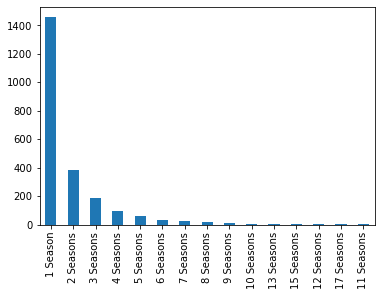

In [652]:
show_hist=data[data["type"]=="TV Show"]
xx=show_hist["duration"].tolist()
pd.Series(xx).value_counts().plot(kind="bar");

TV Shows mostly have 1 seasons.

### Movies Duration Times
*Divided into 3 groups. Those are;*

*Shorter than 90min, between 90min and 150min, longer than 150min.*

In [653]:
pd.options.mode.chained_assignment = None

In [654]:
df_movie

,durationCategory,contentNumber,cat_num
2,shorter than 1.30h,1609,0
0,between 1.30h and 2.30h,3840,1
1,longer than 2.30h,238,2


In [655]:
tags = df_movie["durationCategory"].to_list()
view = df_movie["contentNumber"].to_list()


p= figure(x_range=tags,width=450,
    height=500, title="Number of Movies Added by Duration Category",
           toolbar_location=None, tools="")

p.vbar(x=tags, top=view ,width=0.9)

p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1

#stacked bar chart


show(p)


In [656]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,maturity_ratings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Adults
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Adults
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,Adults
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,Adults
7960,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,Adults
7961,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,Adults
7962,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,Older Kids


Movies, which have between 1.30h and 2.30 in long, take the largest place in Netflix contents, followed by movies of 1.30 hours or less in long. Lastly movies that longer than 2.30h stands in the lowest number.

# Conclusion

In this project, I deep dived into distribution of Movie and TV Shows in Netflix contents. Regarding to pie chart, Movies account for the largest part of the subjects. After that, in order to further elaborate; created rating categories and visualized by grouping content types. Pie charts indicated that motion pictures are mostly for Adult audience. Also upload trend for both shows peaked in 2019. In terms of duration; bar charts showed that series which have fewer season are more than others, however, for movies, average length content consist of the largest piece.

# Further Exploration

- Find out where movies and tv shows recorded (by countries and continents).
- Cast and director analysis
- Creating listed in category for each content and analyze it.

# Resources

[1] https://en.wikipedia.org/wiki/Netflix


[2] https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system

[3] http://bokeh.org/
